<a href="https://colab.research.google.com/github/Nikpell/Lessons/blob/main/hometask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Условие: дана таблица с колонками (id, name, salary, managerId), студентам необходимо написать код на spark, который создаст эту таблицу (данные указаны ниже) и в результате выдаст таблицу в которой будут имена сотрудников, которые зарабатывают больше своих менеджеров.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


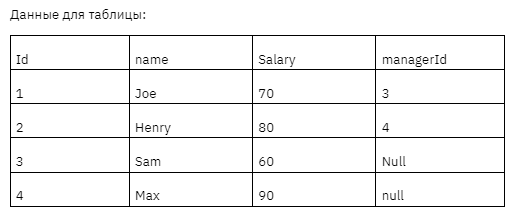

In [20]:
! pip install pyspark

In [21]:
from pyspark.sql import SparkSession

In [22]:
spark = SparkSession.builder.appName("hometask2").getOrCreate()

In [23]:
data = [(1, "Joe", 70, 3),
        (2, "Henry", 80, 4),
        (3, "Sam", 60, None),
        (4, "Max", 90, None)]

df1 = spark.createDataFrame(data, ["Id", "name", "Salary", "managerId"])
df2 = spark.createDataFrame(data, ["Id1", "name1", "Salary1", "managerId1"])
df = df1.join(df2, df1.managerId == df2.Id1)
df.show()

+---+-----+------+---------+---+-----+-------+----------+
| Id| name|Salary|managerId|Id1|name1|Salary1|managerId1|
+---+-----+------+---------+---+-----+-------+----------+
|  1|  Joe|    70|        3|  3|  Sam|     60|      NULL|
|  2|Henry|    80|        4|  4|  Max|     90|      NULL|
+---+-----+------+---------+---+-----+-------+----------+



In [24]:
df.createOrReplaceTempView("worker")

In [25]:
result = spark.sql(
    """
    SELECT name
    FROM worker
    WHERE Salary > Salary1
    """
)

# Выводим результат
result.show()

+----+
|name|
+----+
| Joe|
+----+

